In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

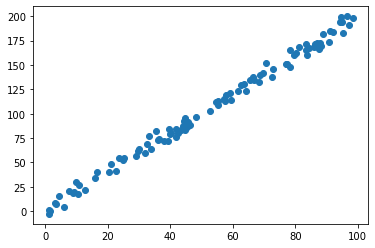

In [2]:
# линеная зависимость...
# инициализация...
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2 * X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

## Градиентный спуск для линейной регрессии

In [35]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))
momentum = 0.9

for _ in range(EPOCHS):
    # предсказание:
    predictions = params[0] + params[1] * X
    # помещаем в список:
    preds.append(predictions)

    # считаем cost (функцию потерь) для отображения потерь на графике
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    # помещаем потери в список
    costs.append(cost)
    
    # обновляем параметры LEARNING_RATE * частную производную
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)
    # print(f'{_}    params[0] = {params[0]}   params[1] = {params[1]}')

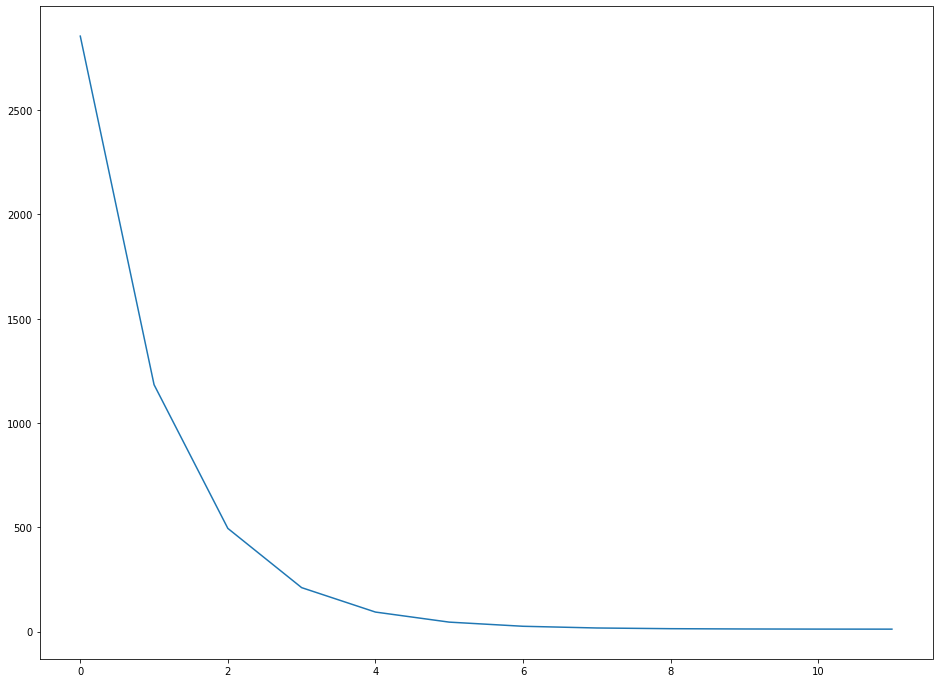

In [36]:
# выводим функцию потерь...
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

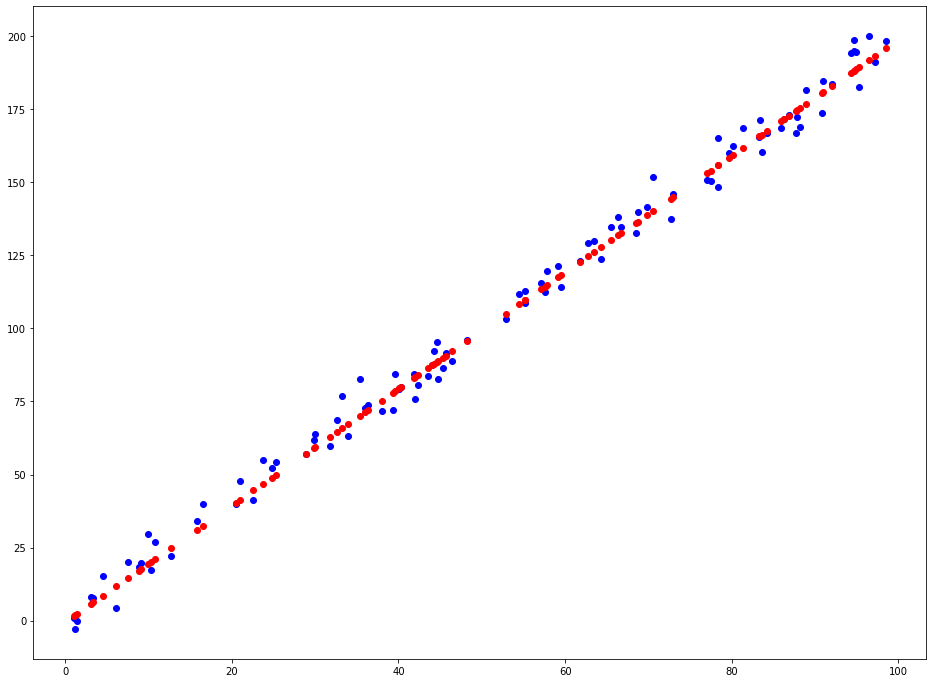

In [37]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [29]:
params

array([2.1239677, 1.9719636])

## Метод Nesterov momentum

In [43]:
# Использую метод Nesterov momentum

EPOCHS = 12
LEARNING_RATE = 0.001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))
momentum = 0.9
m=0

for _ in range(EPOCHS):
    # предсказание:
    predictions = params[0] + params[1] * X
    # помещаем в список:
    preds.append(predictions)

    # считаем cost (функцию потерь) для отображения потерь на графике
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    # помещаем потери в список
    costs.append(cost)
    
    # mt = mt-1 * g + (1-g) * D
    # g - коэф. беру 0,9
    # D - градиент функции потерь.
    m=m*momentum+(1-momentum)
    # print(m)
    
    # обновляем параметры
    # LEARNING_RATE * частную производную (=градиент)
    # params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    # params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)
    
    params[0] -= LEARNING_RATE * m * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * m * np.sum((predictions - Y) * X) / len(predictions)
    # print(f'{_}    params[0] = {params[0]}   params[1] = {params[1]}')

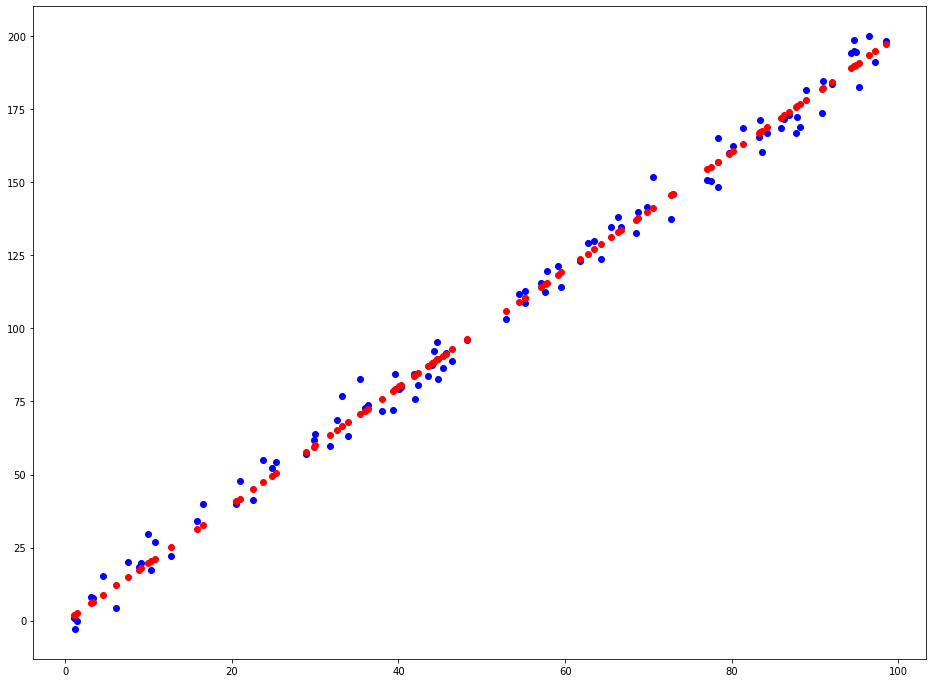

In [44]:
# Визиуализация
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [45]:
params

array([-0.34516333,  2.01014836])

## Метод RMSprop

In [53]:
# Использую метод RMSprop

EPOCHS = 50
LEARNING_RATE = 0.01

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))
v=0.9
m1=0
m2=0
eps=10e-7

for _ in range(EPOCHS):
    # предсказание:
    predictions = params[0] + params[1] * X
    # помещаем в список:
    preds.append(predictions)

    # считаем cost (функцию потерь) для отображения потерь на графике
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    # помещаем потери в список
    costs.append(cost)
    
    # метод RMSprop:
    # Wt+1=Wt+(LEARNING_RATE / sqrt(m+eps)) * gr(f)
    # mi = mi * v + (1-v) * gr(f)^2
    # eps - очень маленькое число. уходим от 0 в знаменателе.
    # gr(f) - градиент функции потерь
    # v - коэфф.
    
    gr1 = np.sum(predictions - Y) / len(predictions)
    gr2 = np.sum((predictions - Y) * X) / len(predictions)
    
    m1 = m1 * v + (1-v) * gr1 * gr1
    m2 = m2 * v + (1-v) * gr1 * gr2
    
    # обновляем параметры
    params[0] -= LEARNING_RATE / np.sqrt(m1 + eps) * gr1
    params[1] -= LEARNING_RATE / np.sqrt(m2 + eps) * gr2
    # print(f'{_}    params[0] = {params[0]}   params[1] = {params[1]}')    

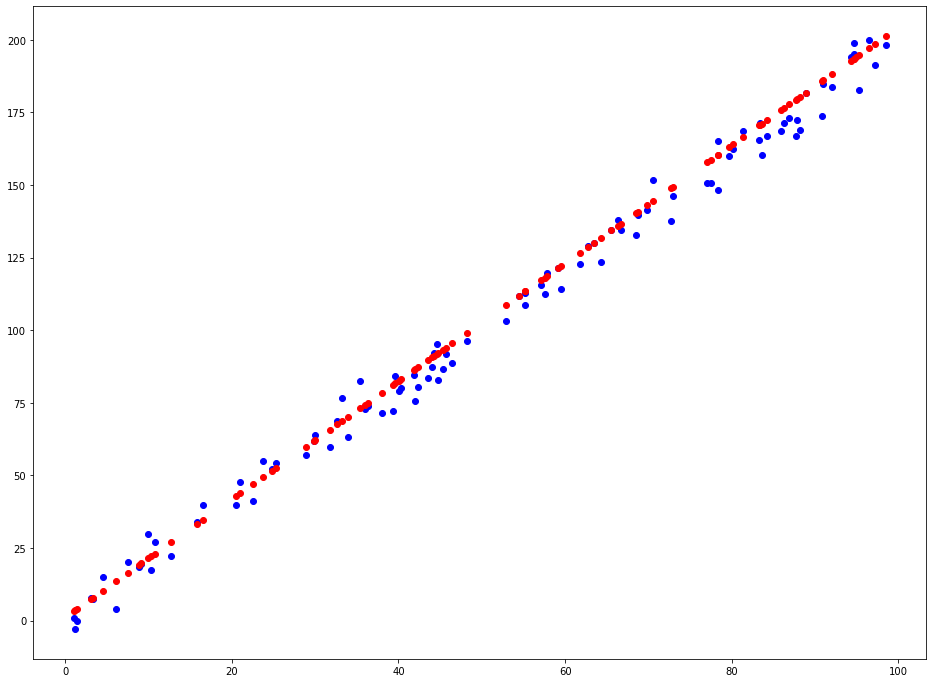

In [54]:
# Визиуализация
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[49], color='red')
plt.show()

In [55]:
params

array([1.15691239, 1.9430484 ])